# Emirates Airways Review Analysis
This project analyzes customer reviews of Emirates Airways to uncover valuable insights into customer satisfaction, service quality, and overall airline experience.

**Prepared by:** Adeel (Roll No: 261985)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv("Emirates Airways Reviews.csv")
df.head()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


In [3]:
# Shape and info about the dataset
print("Shape:", df.shape)
df.info()

Shape: (1540, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1540 non-null   object 
 1   Date Published   1540 non-null   object 
 2   Status           1398 non-null   object 
 3   Aircraft         1037 non-null   object 
 4   Travel Type      1540 non-null   object 
 5   Travel Class     1540 non-null   object 
 6   Route            1538 non-null   object 
 7   Date Flown       1540 non-null   object 
 8   Seating Comfort  1477 non-null   float64
 9   Staff Service    1476 non-null   float64
 10  Food Quality     1418 non-null   float64
 11  Entertainment    1380 non-null   float64
 12  WiFi             934 non-null    float64
 13  Ground Service   1501 non-null   float64
 14  Value for Money  1540 non-null   int64  
 15  Recommended      1540 non-null   object 
 16  Overall Rating   1540 non-null   int64  
 

In [4]:
# Check for missing values
print(df.isnull().sum())

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64


In [5]:
# Statistical summary of numerical columns
df.describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


##  Correlation Between Features

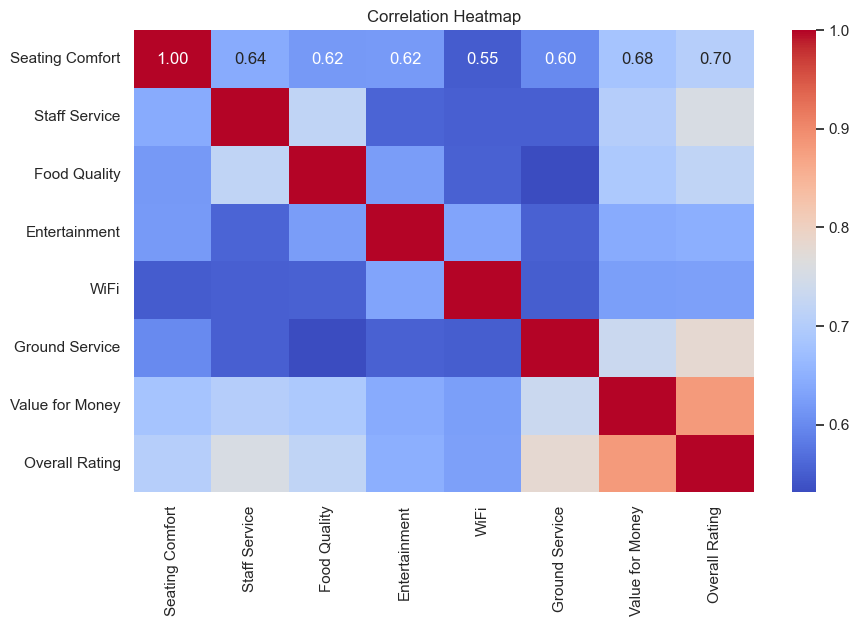

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##  Average Scores of Review Features

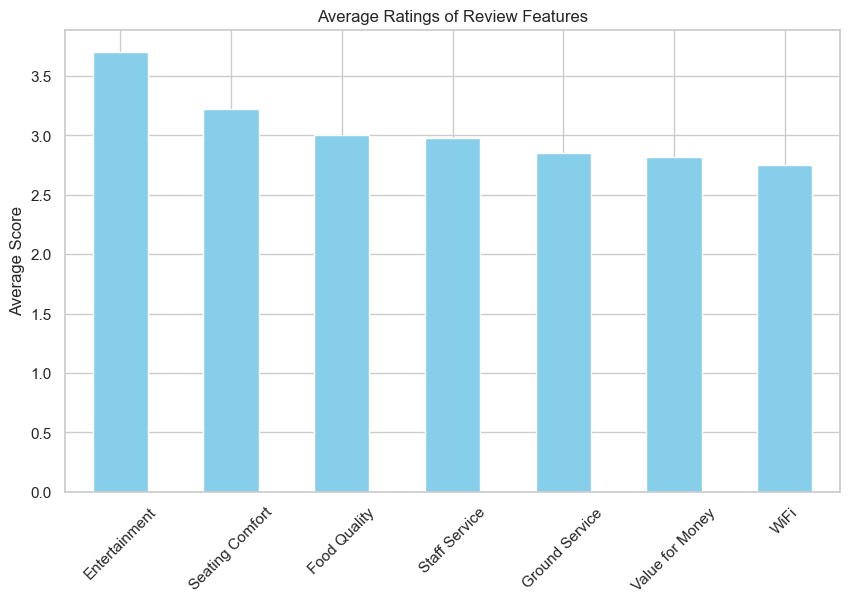

In [7]:
ratings = df[['Seating Comfort', 'Staff Service', 'Food Quality', 'Entertainment', 'WiFi', 'Ground Service', 'Value for Money']]
ratings.mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Average Ratings of Review Features')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

## Is Value for Money Related to Overall Satisfaction?

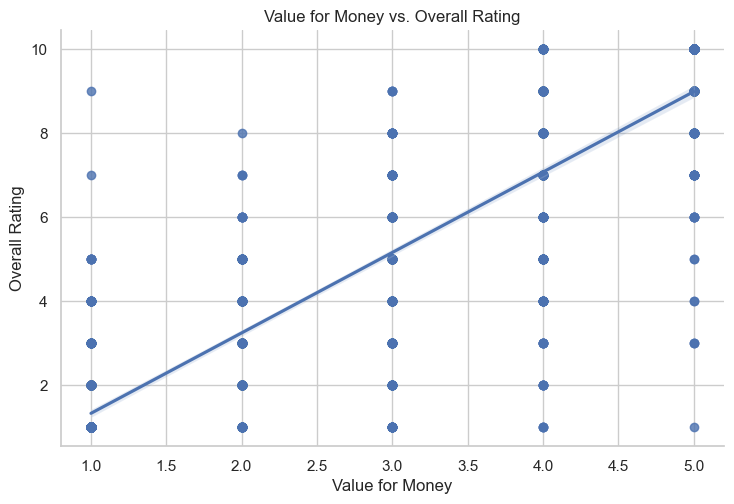

In [8]:
sns.lmplot(data=df, x='Value for Money', y='Overall Rating', aspect=1.5)
plt.title('Value for Money vs. Overall Rating')
plt.show()

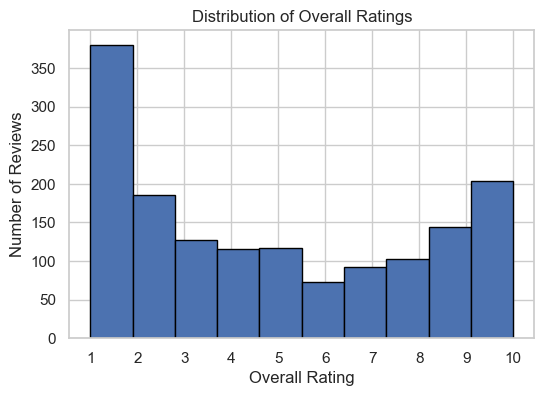

In [9]:
# Histogram of Overall Rating
plt.figure(figsize=(6,4))
plt.hist(df['Overall Rating'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1,11))
plt.show()


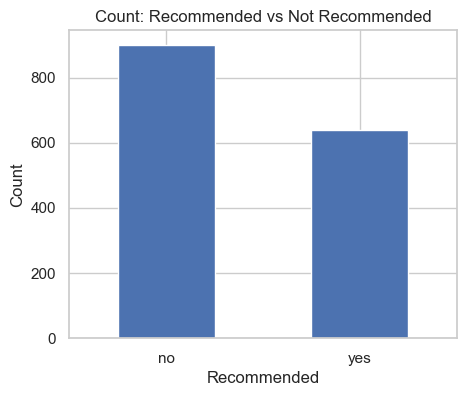

In [10]:
# Bar chart of Recommended counts
counts = df['Recommended'].value_counts()
counts.plot(kind='bar', figsize=(5,4))
plt.title('Count: Recommended vs Not Recommended')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


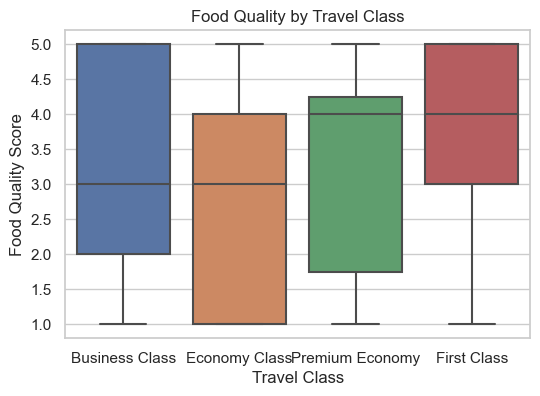

In [11]:
# Boxplot of Food Quality across Travel Classes
plt.figure(figsize=(6,4))
sns.boxplot(x='Travel Class', y='Food Quality', data=df)
plt.title('Food Quality by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Food Quality Score')
plt.show()


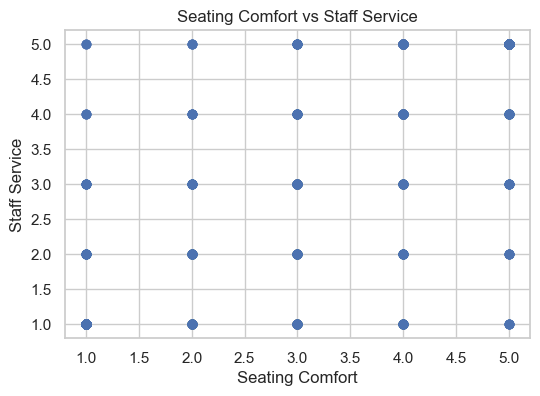

In [12]:
# Scatter: Seating Comfort vs Staff Service
plt.figure(figsize=(6,4))
plt.scatter(df['Seating Comfort'], df['Staff Service'], alpha=0.5)
plt.title('Seating Comfort vs Staff Service')
plt.xlabel('Seating Comfort')
plt.ylabel('Staff Service')
plt.show()


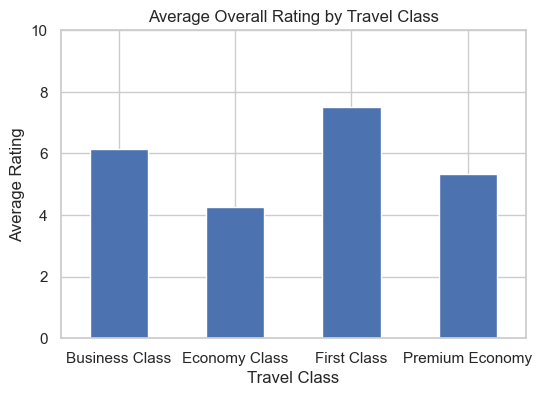

In [13]:
#Average Overall Rating by Class
avg_rating = df.groupby('Travel Class')['Overall Rating'].mean()

plt.figure(figsize=(6,4))
avg_rating.plot(kind='bar')
plt.title('Average Overall Rating by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.xticks(rotation=0)
plt.show()


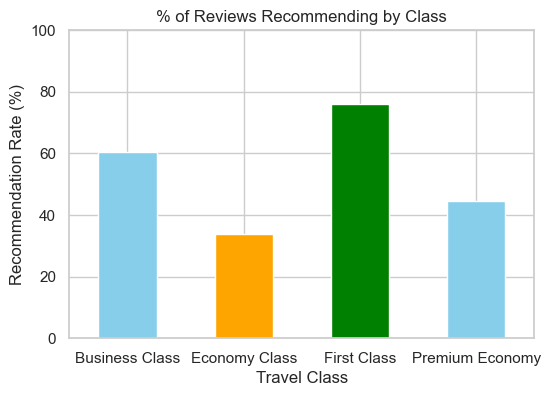

In [14]:
#  Percentage Recommended by Class
rec_pct = df.groupby('Travel Class')['Recommended'].apply(
    lambda x: x.map({'yes':1,'no':0}).mean() * 100
)

plt.figure(figsize=(6,4))
rec_pct.plot(kind='bar', color=['skyblue','orange','green'])
plt.title('% of Reviews Recommending by Class')
plt.xlabel('Travel Class')
plt.ylabel('Recommendation Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()


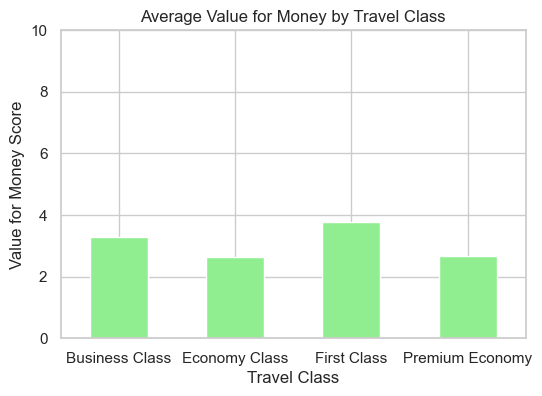

In [15]:
# Average Value for Money by Class
avg_value = df.groupby('Travel Class')['Value for Money'].mean()

plt.figure(figsize=(6,4))
avg_value.plot(kind='bar', color='lightgreen')
plt.title('Average Value for Money by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Value for Money Score')
plt.ylim(0, 10)
plt.xticks(rotation=0)
plt.show()


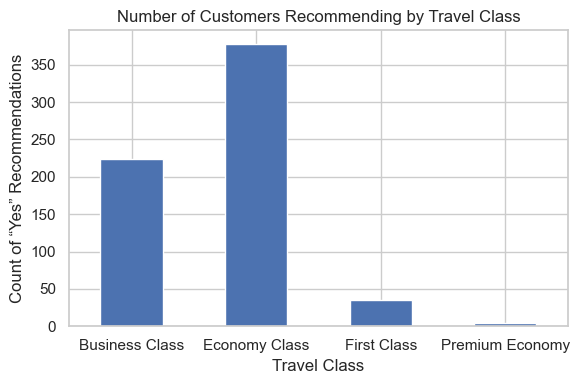

In [16]:
# Count of customers who recommend Emirates, by class
rec_by_class = df[df['Recommended']=='yes'].groupby('Travel Class').size()

# Plot a bar chart
plt.figure(figsize=(6,4))
rec_by_class.plot(kind='bar')
plt.title('Number of Customers Recommending by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Count of “Yes” Recommendations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


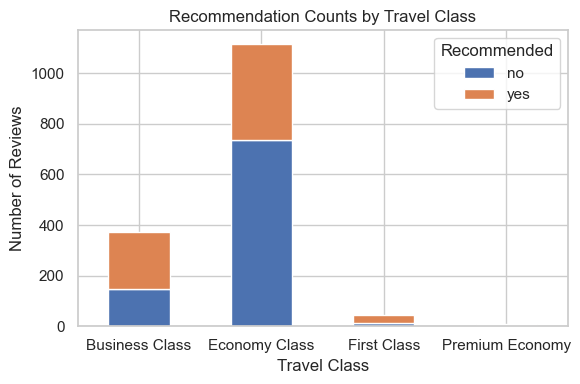

In [18]:
# 1. Prepare counts of Recommended by Travel Class
counts = df.groupby(['Travel Class', 'Recommended']).size().unstack(fill_value=0)

# 2. Plot as a stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Recommendation Counts by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Number of Reviews')
plt.legend(title='Recommended')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
